In [1]:
import ll

ll.pretty()

TensorBoard/TensorBoardX not found. Disabling TensorBoardLogger. Please install TensorBoard with `pip install tensorboard` or TensorBoardX with `pip install tensorboardx` to enable TensorBoard logging.


In [2]:
from pathlib import Path

from jmppeft.tasks.finetune import dataset_config as DC

# from jmppeft.datasets.matbench_discovery_megnet_npz import

base_path = Path("/mnt/datasets/matbench-discovery-traj/megnet-133k-npz/")
config = DC.matbench_discovery_config(
    base_path,
    "val",
    use_megnet_133k=True,
    use_atoms_metadata=True,
    use_linref=True,
)
config

[16:51:21] CRITICAL Type checking the following modules: ('jmppeft',)                               ]8;id=499747;file:///workspaces/ll/src/ll/typecheck.py\typecheck.py]8;;\:]8;id=830052;file:///workspaces/ll/src/ll/typecheck.py#65\65]8;;\

Loading 'wbm_summary' from cached file at '/root/.cache/matbench-discovery/1.0.0/wbm/2023-12-13-wbm-summary.csv.gz'


FinetuneMatbenchDiscoveryMegNet133kDatasetConfig(base_path=Path('/mnt/datasets/matbench-discovery-traj/megnet-133k-npz/val'), energy_linref_path=Path('/mnt/datasets/matbench-discovery-traj/megnet-133k-npz/linrefs.npy'))

In [4]:
dataset = config.create_dataset()
print(len(dataset))

9384


In [5]:
import numpy as np
from torch.utils.data import DataLoader
from torch_geometric.data import Data
from tqdm.auto import tqdm


def collate_fn(data_list: list[Data]):
    return np.concatenate([data.force.float().numpy() for data in data_list], axis=0)


dataloader = DataLoader(
    dataset,
    batch_size=256,
    collate_fn=collate_fn,
    pin_memory=False,
    num_workers=0,
)

forces_list: list[np.ndarray] = []
for batch in tqdm(dataloader, total=len(dataloader)):
    forces_list.append(batch)

print(len(forces_list))

  0%|          | 0/37 [00:00<?, ?it/s]

37


In [6]:
forces_cat = np.concatenate(forces_list, axis=0)
forces_cat

array[281551, 3] f32 n=844653 (3.2Mb) x∈[-1.301e+03, 1.301e+03] μ=6.396e-10 σ=5.396

/opt/conda/envs/jmp-peft/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/conda/envs/jmp-peft/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


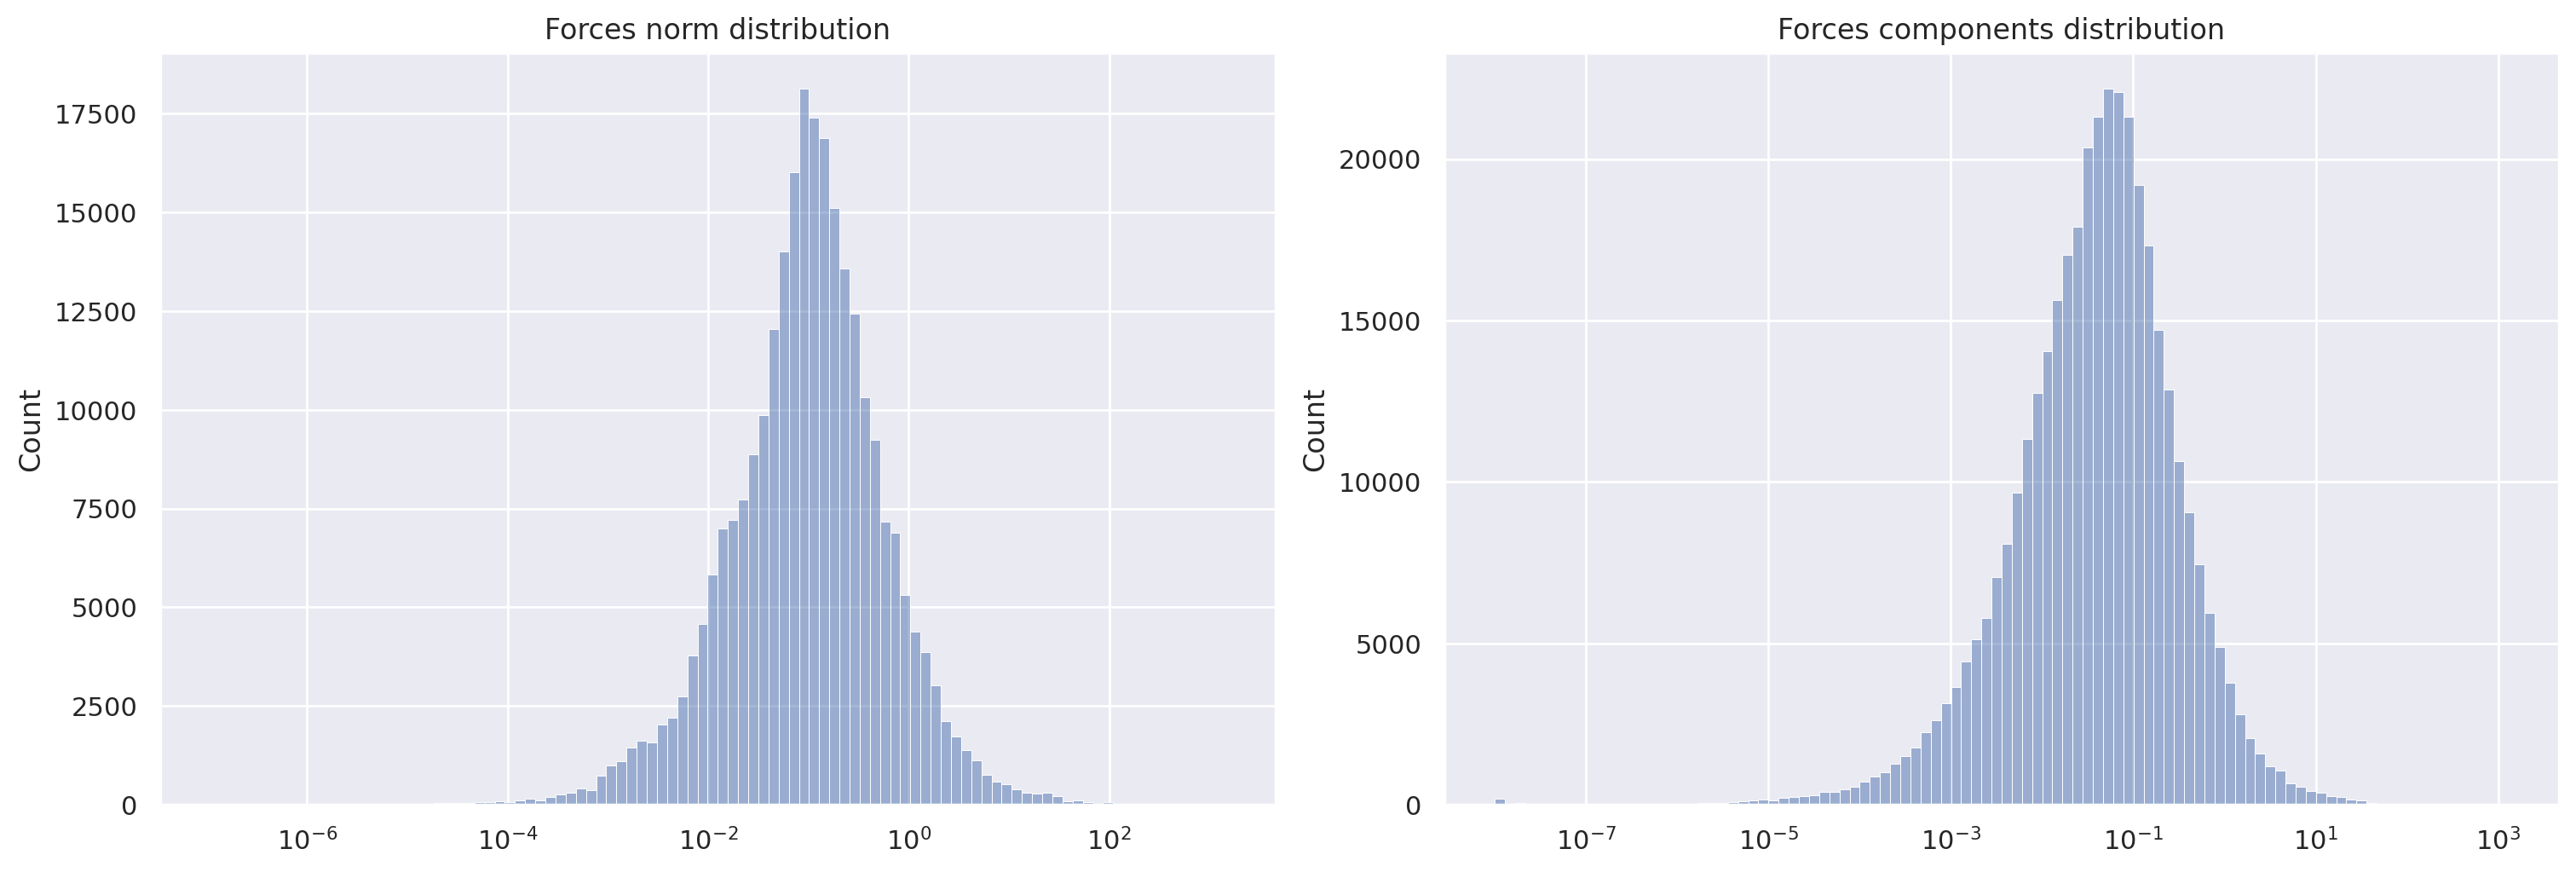

/opt/conda/envs/jmp-peft/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/conda/envs/jmp-peft/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/conda/envs/jmp-peft/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


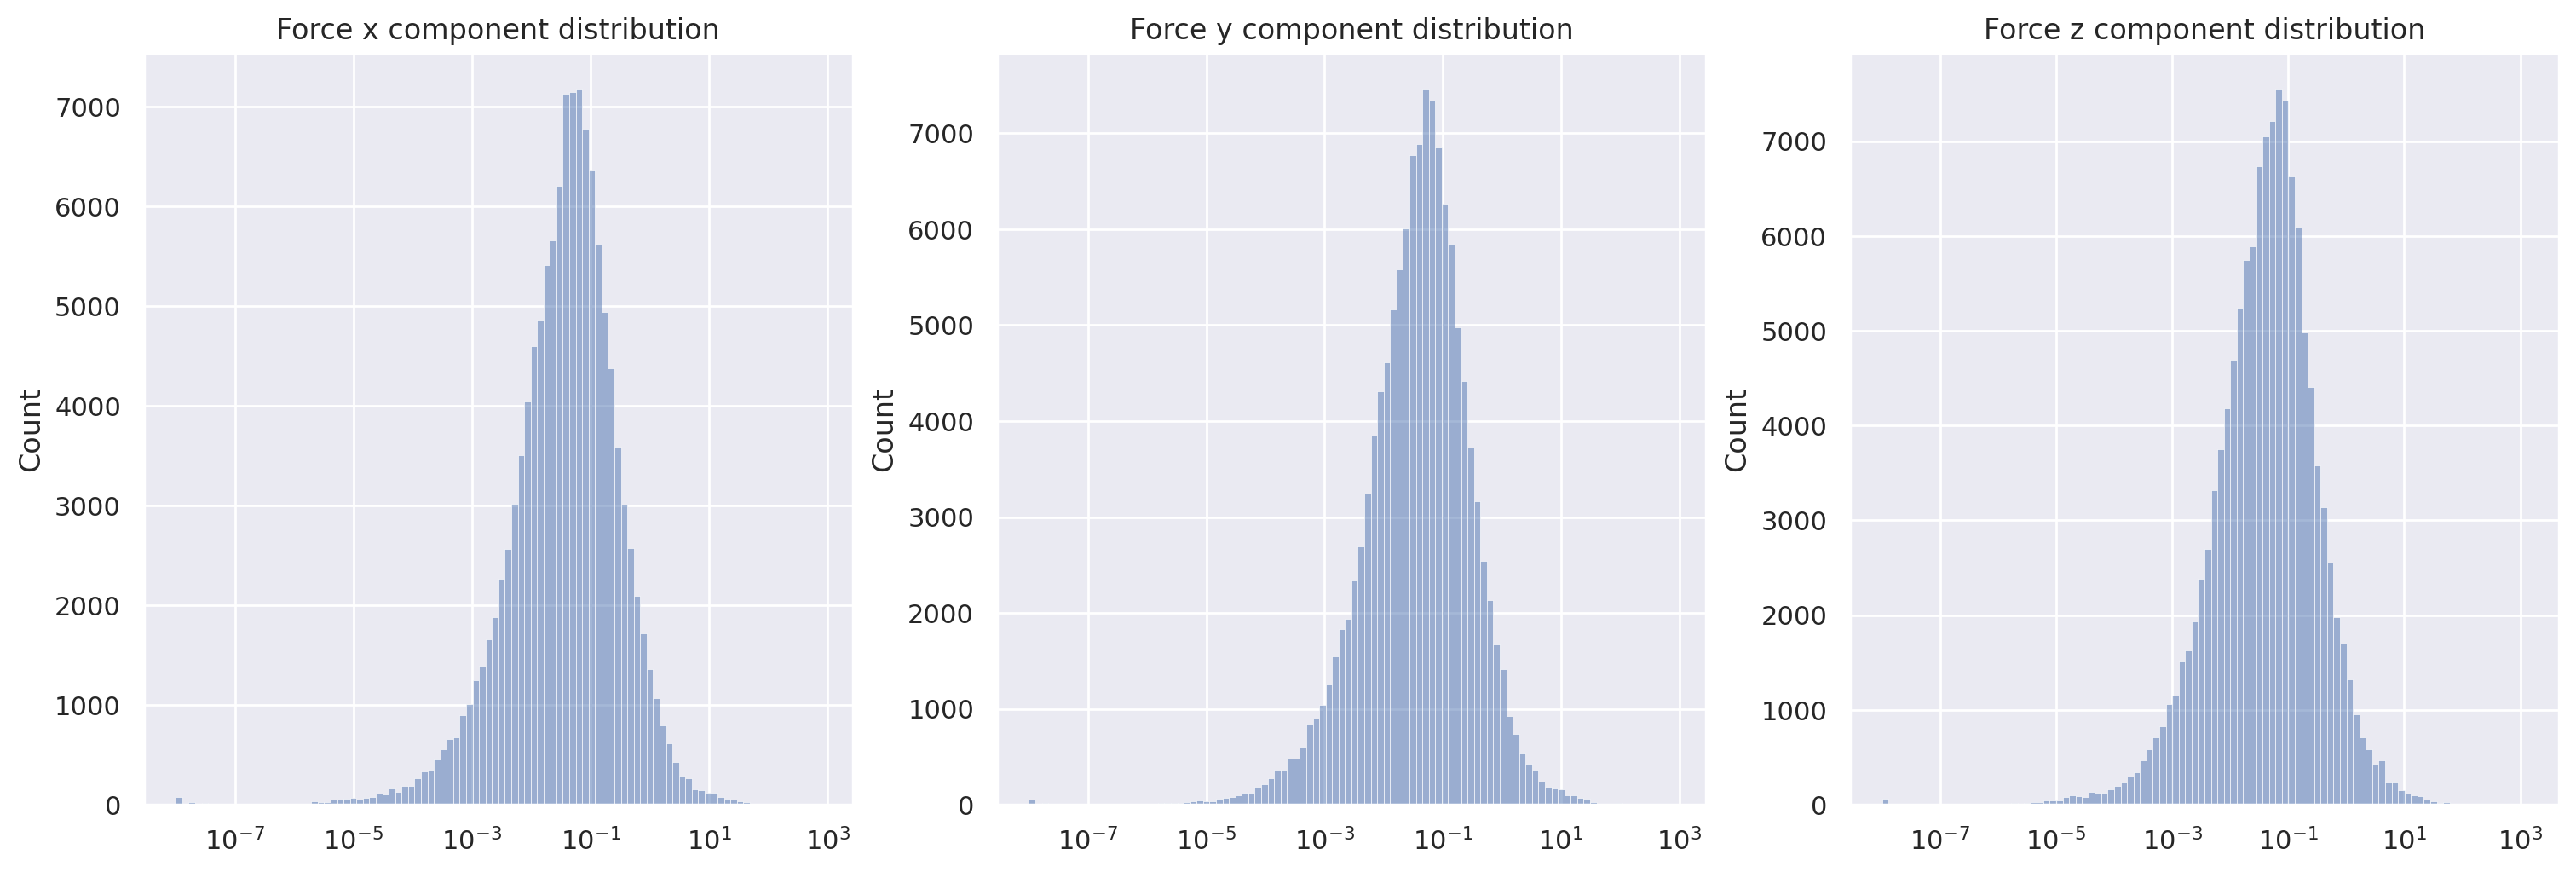

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

N_BINS = 100

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Norm plot
ax = sns.histplot(
    np.linalg.norm(forces_cat, axis=1),
    kde=True,
    ax=axes[0],
    bins=N_BINS,
    log_scale=True,
)
ax.set_title("Forces norm distribution")

# Components plot
ax = sns.histplot(
    forces_cat.flatten(),
    kde=True,
    ax=axes[1],
    bins=N_BINS,
    log_scale=True,
)
ax.set_title("Forces components distribution")

plt.show()

# Each component plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axes):
    ax = sns.histplot(
        forces_cat[:, i],
        kde=True,
        ax=ax,
        bins=N_BINS,
        log_scale=True,
    )
    c = "xyz"[i]
    ax.set_title(f"Force {c} component distribution")

plt.show()

(-500.0, 500.0)

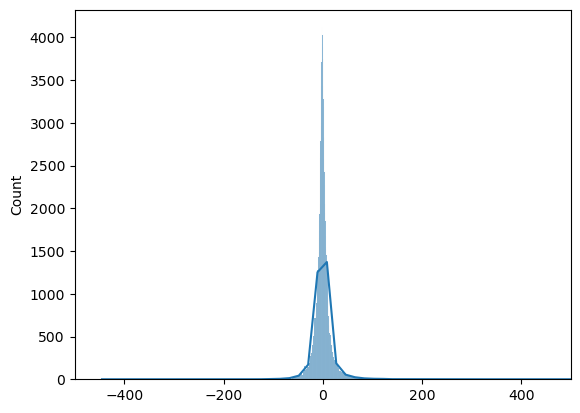

In [12]:
import seaborn as sns

energies_np = np.array(energies)
sns.histplot(energies_np, kde=True)
plt.xlim(-500, 500)